<h3>Analisis algoritma Machine Learning menggunakan Suport Vektor Machine, Naive Bayes, dan Random Forest untuk menemukan akurasi tinggi dalam penerimaa Vaksin H1N1 kasus Influenza</h3>
<p>Dalam kasus ini penulis memiliki batasan dalam melakukan kasusnya, yang hanya berfokus pada prediksi vaksin H1N1 bukan vaksin flu musiaman atau (seasonal_vaksin)</p>
<p>Tujuanya adalah untuk memberikan analisa mana model machine learning yang terbaik dalam akurasi penerimaan vaksin</p>

In [ ]:
# #backup library asli
# import pandas as pd
# pd.set_option('display.max_columns', None)
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.metrics import (
#     confusion_matrix,
#     accuracy_score,
#     precision_score,
#     recall_score,
#     f1_score,
#     roc_curve,
#     auc,
#     make_scorer,
#     roc_auc_score

# )

# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC

# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from imblearn.over_sampling import SMOTE
# from imblearn.pipeline import Pipeline
# from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate
# from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    make_scorer,
    roc_auc_score

)

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix




<h2>Data Pre-Processing</h2>

In [2]:
data = pd.read_csv('data/H1N1_Flu_Vaccines.csv')
data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [3]:
#cek dimensi data dan tipe data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

<Axes: >

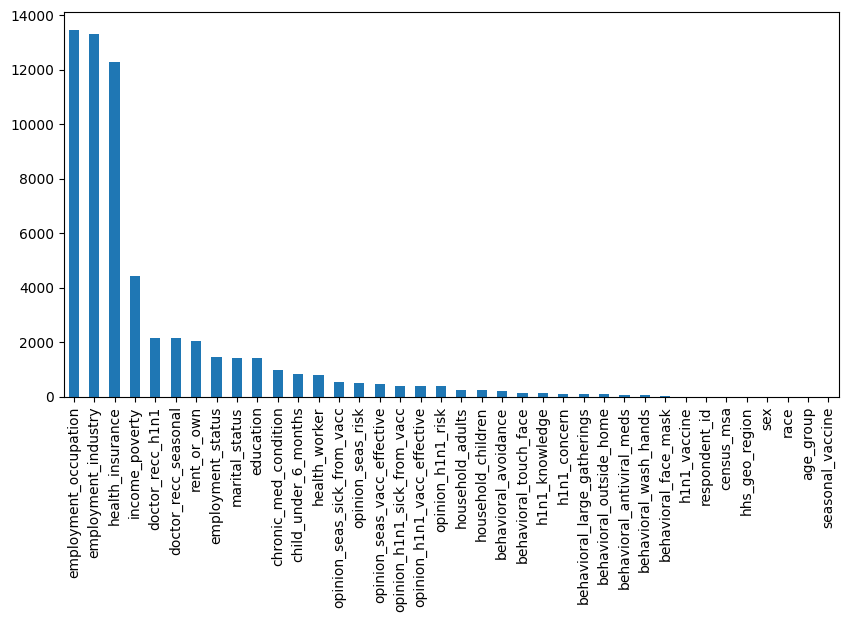

In [4]:
data.isna().sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<p>grafik diatas menampilkan kolom yang memiliki missing value</p>

In [5]:
for col in data.columns:
    if data[col].isna().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_10804\236084314.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


mengisi nilai missing value dengan nilai modus, karena untuk data kategorikal dan numerikal akan lebih aman disi dengan nilai modus untuk menghindari data bias

In [6]:
data.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [7]:
# data.drop(columns=['respondent_id','doctor_recc_seasonal','opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc','race','sex','income_poverty','hhs_geo_region','census_msa','employment_industry','employment_occupation','seasonal_vaccine'], inplace=True)
data.drop(columns=['respondent_id','race','sex','income_poverty','hhs_geo_region','census_msa','employment_industry','employment_occupation'], inplace=True)

kolom yang tidak berpengaruh dalam hasil prediksi vaksin influenza dihilangkan


In [8]:
data.shape

(26707, 30)

In [9]:
#melakukan one hot encoding pada data kategorikal
categorical=data.select_dtypes(object).columns
data=pd.get_dummies(data,columns=categorical)

#mengubah tipe data boolean menjadi integer
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)


Fitur kategorikal yang bertipe object dikonversi menjadi bentuk numerik menggunakan teknik one-hot encoding agar dapat diproses oleh algoritma machine learning.

In [10]:
data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0


In [11]:
data.shape

(26707, 41)

In [12]:
data.columns = (
    data.columns
      .str.lower()
      .str.strip()
      .str.replace(' ', '_')
)

<h1>EXPLORATORY DATA ANALYIS</h1>

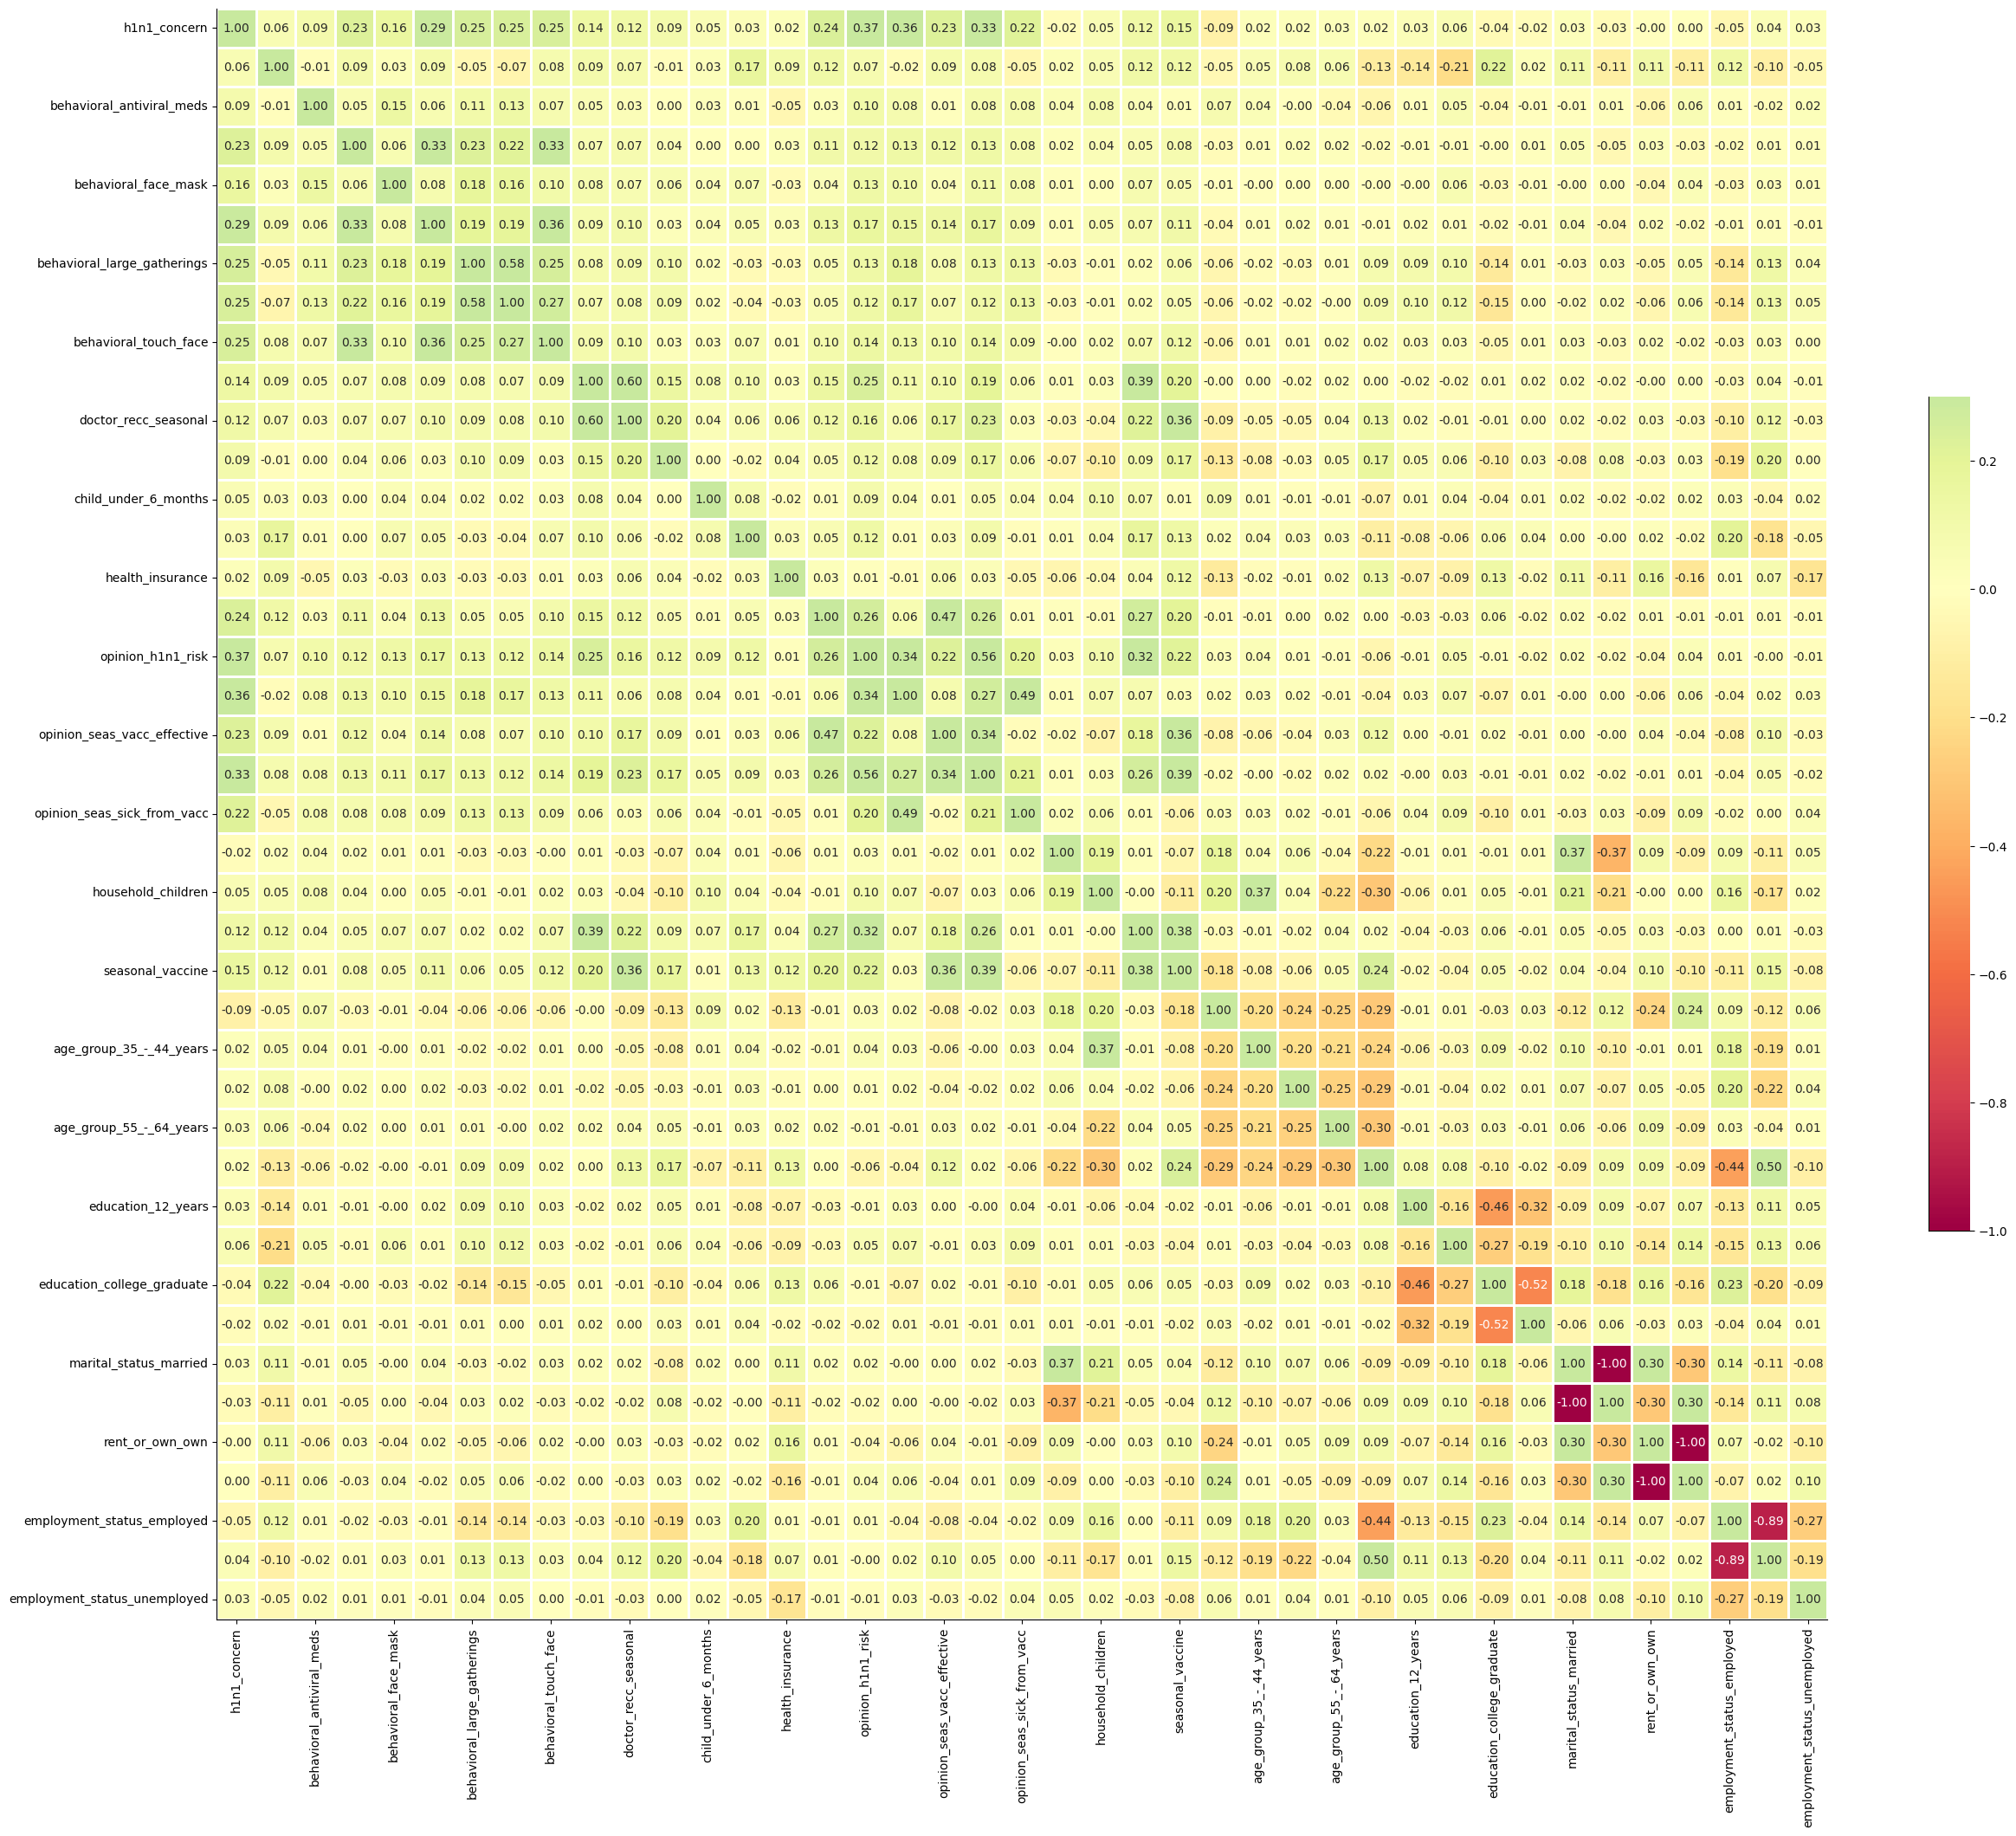

In [13]:
corr = data.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='Spectral')
sns.despine()
g.figure.set_size_inches(30,25)
    
plt.show()

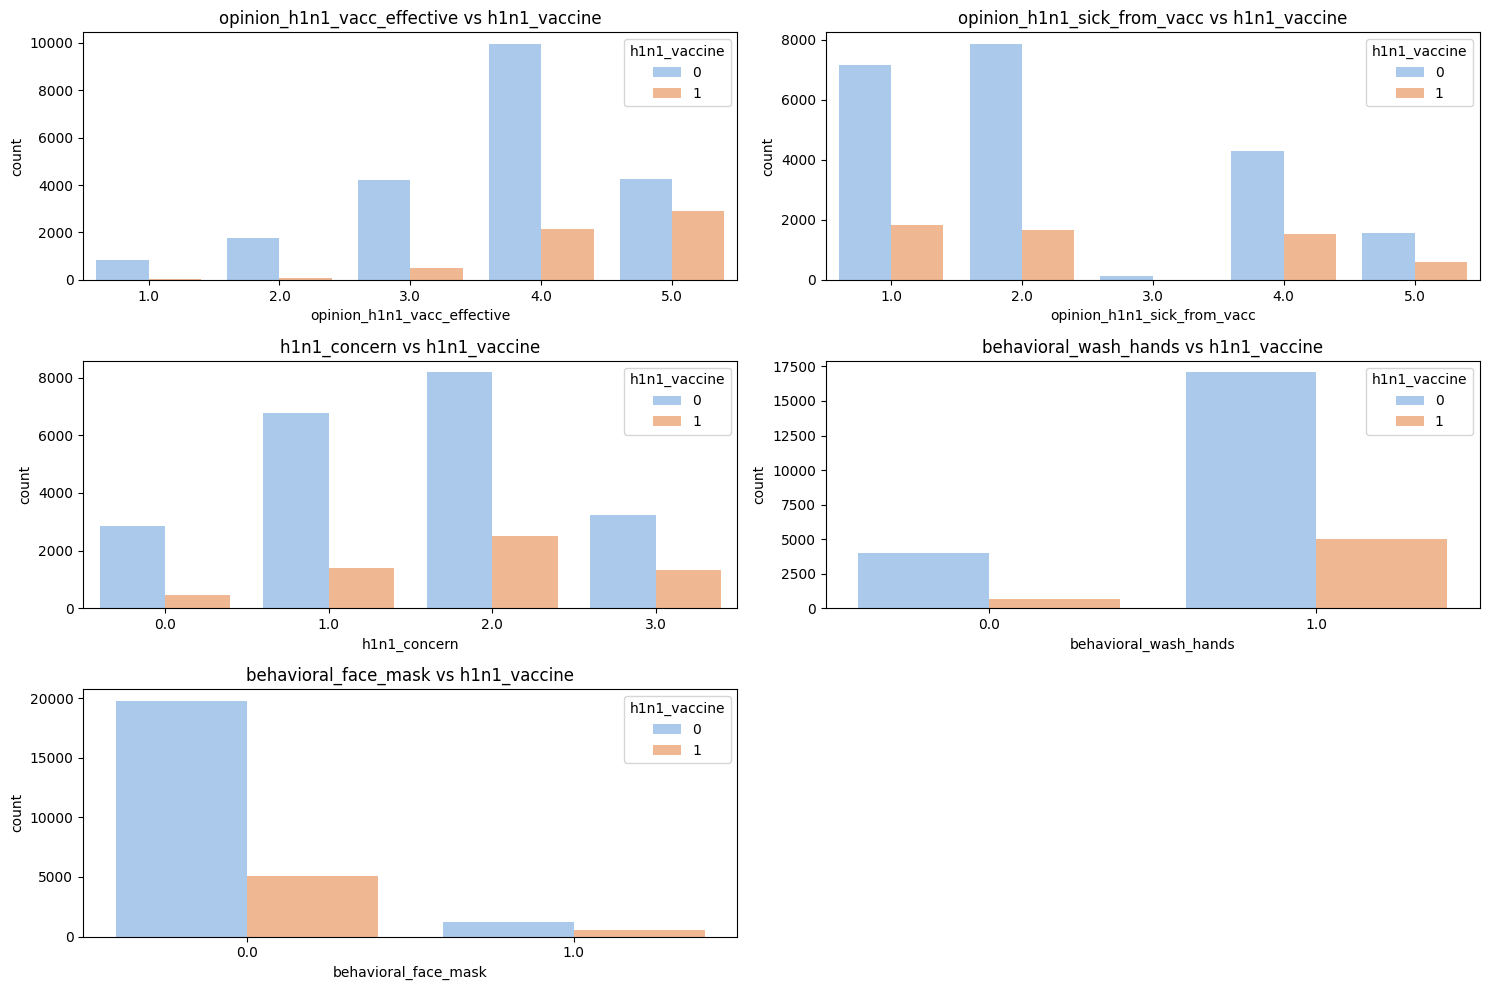

In [14]:
plt.figure(figsize=(15, 10))

features = [
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_sick_from_vacc',
    'h1n1_concern',
    'behavioral_wash_hands',
    'behavioral_face_mask'
]

for i, col in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(
        data=data,
        x=col,
        hue='h1n1_vaccine',
        palette='pastel'
    )
    plt.title(f'{col} vs h1n1_vaccine')

plt.tight_layout()
plt.show()


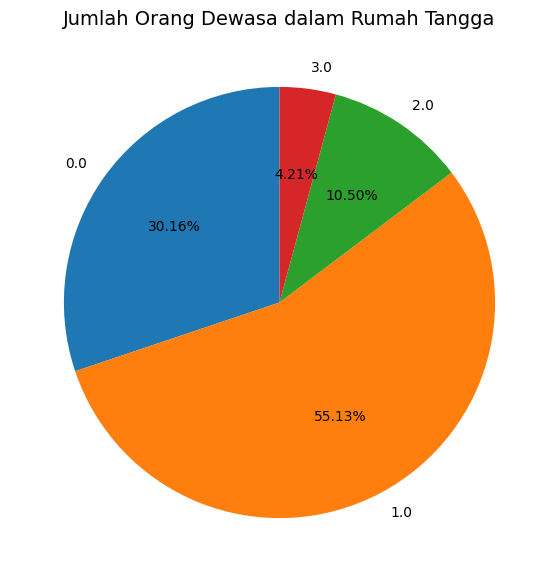

In [15]:
adult_counts = data['household_adults'].value_counts().sort_index()
plt.figure(figsize=(7, 7))
plt.pie(
    adult_counts,
    labels=adult_counts.index,
    autopct='%1.2f%%',
    startangle=90
)

plt.title('Jumlah Orang Dewasa dalam Rumah Tangga', fontsize=14)
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_10804\1078033937.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="behavioral_antiviral_meds", data=data, palette="pastel")
C:\Users\asus\AppData\Local\Temp\ipykernel_10804\1078033937.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="behavioral_avoidance", data=data, palette="pastel")
C:\Users\asus\AppData\Local\Temp\ipykernel_10804\1078033937.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="behavioral_face_mask", data=data, palette="pastel")
C:\Users\asus\AppData\Local\Temp\i

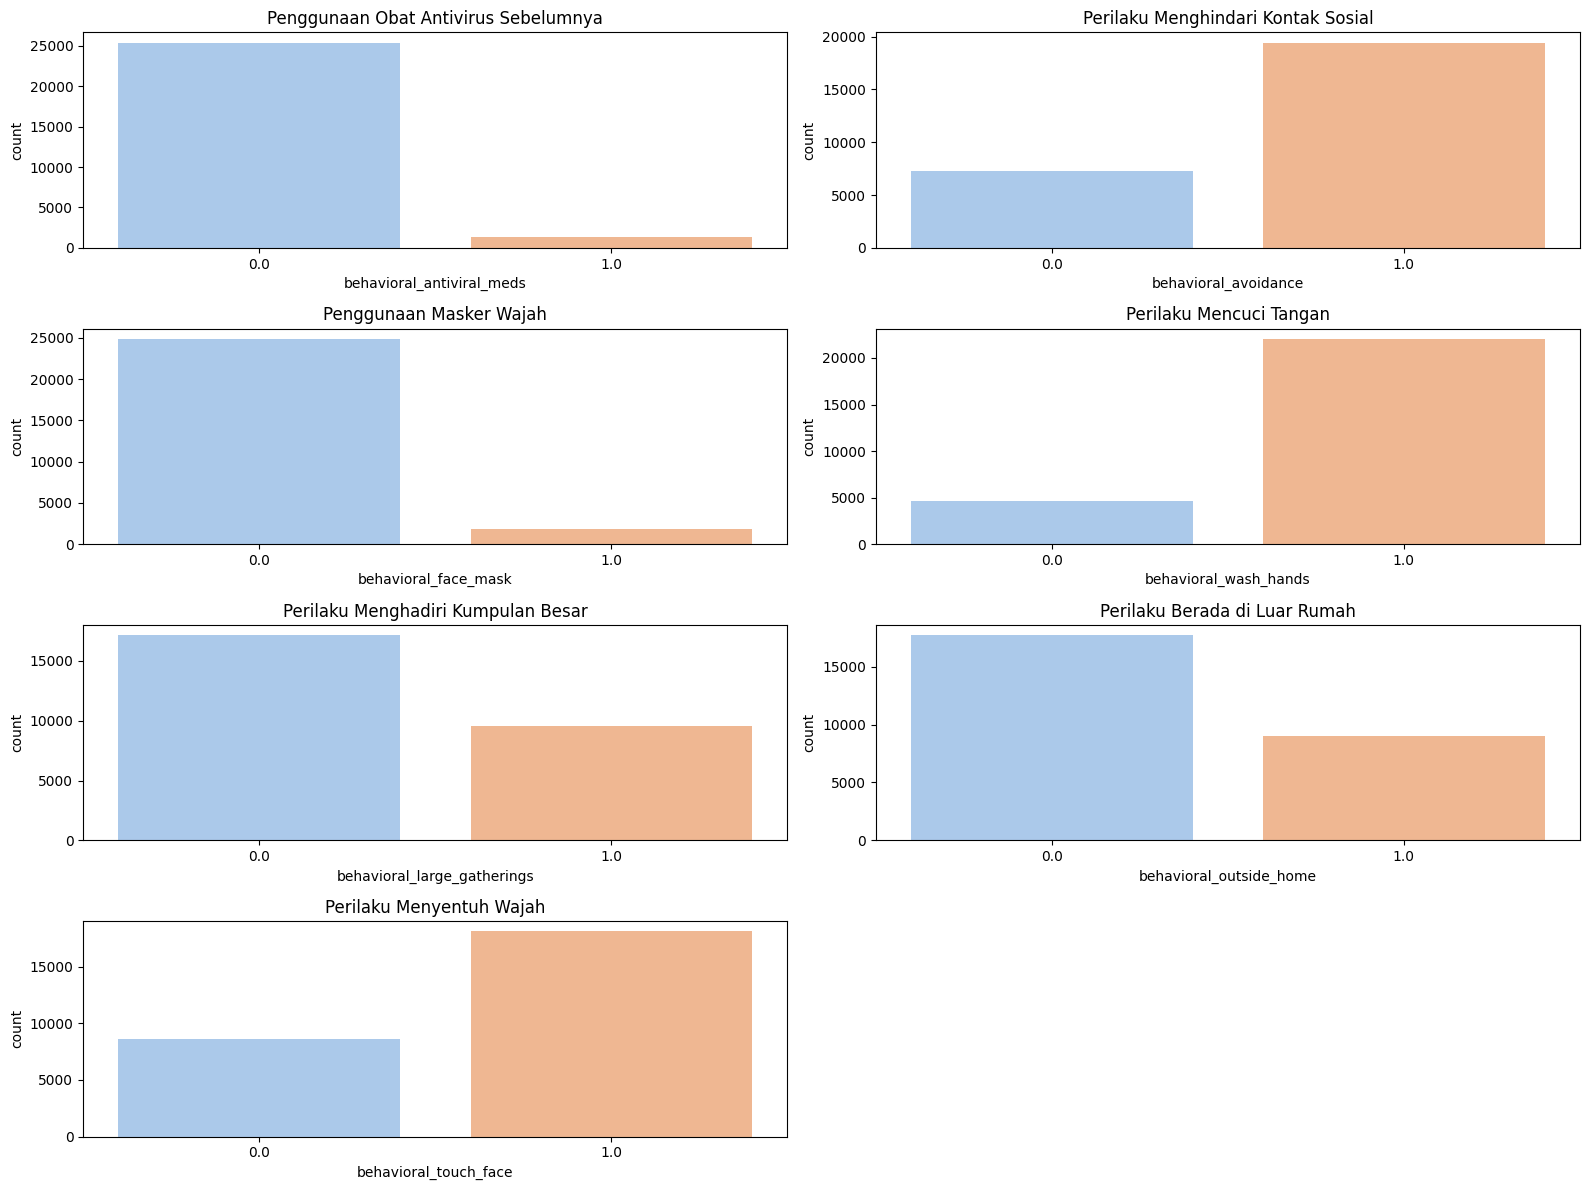

In [16]:
plt.figure(figsize=(16, 12))

plt.subplot(4, 2, 1)
sns.countplot(x="behavioral_antiviral_meds", data=data, palette="pastel")
plt.title('Penggunaan Obat Antivirus Sebelumnya')

plt.subplot(4, 2, 2)
sns.countplot(x="behavioral_avoidance", data=data, palette="pastel")
plt.title('Perilaku Menghindari Kontak Sosial')

plt.subplot(4, 2, 3)
sns.countplot(x="behavioral_face_mask", data=data, palette="pastel")
plt.title('Penggunaan Masker Wajah')

plt.subplot(4, 2, 4)
sns.countplot(x="behavioral_wash_hands", data=data, palette="pastel")
plt.title('Perilaku Mencuci Tangan')

plt.subplot(4, 2, 5)
sns.countplot(x="behavioral_large_gatherings", data=data, palette="pastel")
plt.title('Perilaku Menghadiri Kumpulan Besar')

plt.subplot(4, 2, 6)
sns.countplot(x="behavioral_outside_home", data=data, palette="pastel")
plt.title('Perilaku Berada di Luar Rumah')

plt.subplot(4, 2, 7)
sns.countplot(x="behavioral_touch_face", data=data, palette="pastel")
plt.title('Perilaku Menyentuh Wajah')

plt.tight_layout()
plt.show()


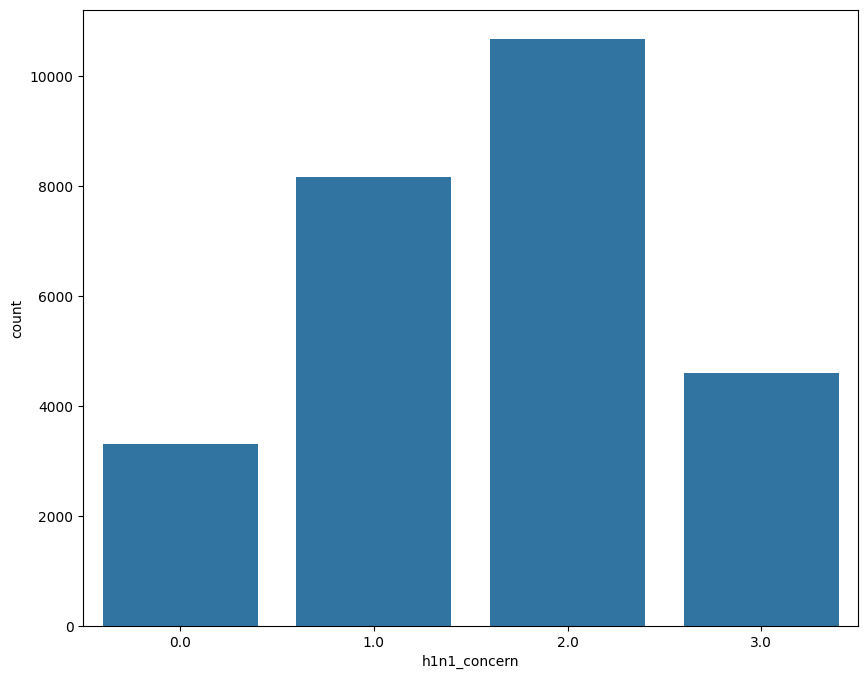

In [17]:
#visualisasi distribusi label h1n1_concern

plt.figure(figsize=(10,8))
sns.countplot(x="h1n1_concern",data=data)
plt.show()

In [ ]:
# plt.figure(figsize=(10,8))
# sns.countplot(
#     x="h1n1_vaccine",
#     data=data_cleaned,
#     palette="pastel"
# )

# plt.show()


In [18]:
x = data.drop("h1n1_vaccine", axis=1)
y = data["h1n1_vaccine"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<h1>Cross Validation</h1>

In [ ]:
models = {
    "SVM": SVC(kernel='rbf', probability=True, C=10, gamma='scale', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42),
    "Naive Bayes": GaussianNB()
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

cv_results = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('scaler', MinMaxScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

    scores = cross_validate(
        pipeline,
        x_train,
        y_train,
        cv=cv,
        scoring=scoring
    )

    cv_results[name] = {
        metric: scores[f'test_{metric}'].mean()
        for metric in scoring
    }



cv_df = pd.DataFrame(cv_results).T
print(cv_df)


Best Score (F1): 0.6314942884926175
Best Params: {'model__n_estimators': 200, 'model__min_samples_split': 5, 'model__max_depth': 10, 'model__criterion': 'gini'}


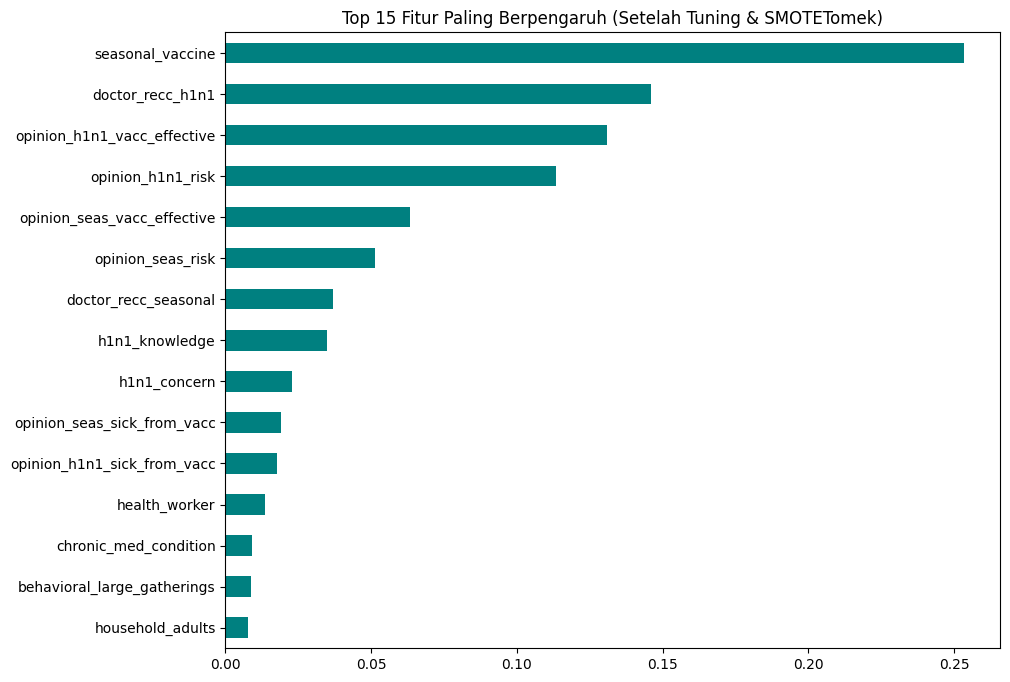

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek # Teknik Hybrid: Oversampling + Cleaning

# 1. Pipeline dengan SMOTETomek
# SMOTETomek akan menambah kelas minoritas DAN menghapus data yang tumpang tindih
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('resample', SMOTETomek(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

# 2. Parameter Space untuk Tuning
# Kita fokus pada Random Forest karena paling stabil untuk data tabular
param_distributions = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, 30, None],
    'model__min_samples_split': [2, 5, 10],
    'model__criterion': ['gini', 'entropy']
}

# 3. Mencari Parameter Terbaik secara otomatis
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(
    pipeline, 
    param_distributions, 
    n_iter=10, # Mencoba 10 kombinasi acak (hemat waktu untuk 29k data)
    cv=cv, 
    scoring='f1', # Fokus meningkatkan keseimbangan Precision & Recall
    n_jobs=-1,
    random_state=42
)

search.fit(x_train, y_train)

# 4. Mendapatkan Model Terbaik
best_model = search.best_estimator_
print(f"Best Score (F1): {search.best_score_}")
print(f"Best Params: {search.best_params_}")

# 5. Visualisasi Feature Importance
# Ini membantu Anda melihat fitur mana yang paling berpengaruh pada kenaikan F1
importances = best_model.named_steps['model'].feature_importances_
feature_names = x_train.columns
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
feat_importances.head(15).plot(kind='barh', color='teal')
plt.title('Top 15 Fitur Paling Berpengaruh (Setelah Tuning & SMOTETomek)')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# 1. Inisialisasi Model
models = {
    "SVM": SVC(kernel='rbf', C=5, gamma='scale', probability=True, random_state=100),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_split=8, random_state=100)
}

performa_hasil = []

# 2. Proses SEBELUM SMOTE (Menggunakan x_train, y_train asli)
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    performa_hasil.append({
        'Model': name,
        'Kondisi': 'Sebelum SMOTE',
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
        
    })

# 3. Proses SESUDAH SMOTE (Menggunakan x_smote, y_smote)
for name, model in models.items():
    model.fit(x_smote, y_smote)
    y_pred = model.predict(x_test) # Evaluasi tetap pada data test asli
    
    performa_hasil.append({
        'Model': name,
        'Kondisi': 'Sesudah SMOTE',
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
        
    })

# 4. Konversi ke DataFrame
df_compare = pd.DataFrame(performa_hasil)

metrics = ['Accuracy', 'Recall', 'F1-Score', 'Precision']
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

for i, metric in enumerate(metrics):
    sns.barplot(data=df_compare, x='Model', y=metric, hue='Kondisi', ax=axes[i])
    axes[i].set_title(f'Perbandingan {metric}', fontsize=14, fontweight='bold')
    axes[i].set_ylim(0, 1.0)
    
    # Menambahkan label nilai di atas bar
    for p in axes[i].patches:
        axes[i].annotate(format(p.get_height(), '.2f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = 'center', va = 'center', 
                         xytext = (0, 9), textcoords = 'offset points')
plt.tight_layout()
plt.show()

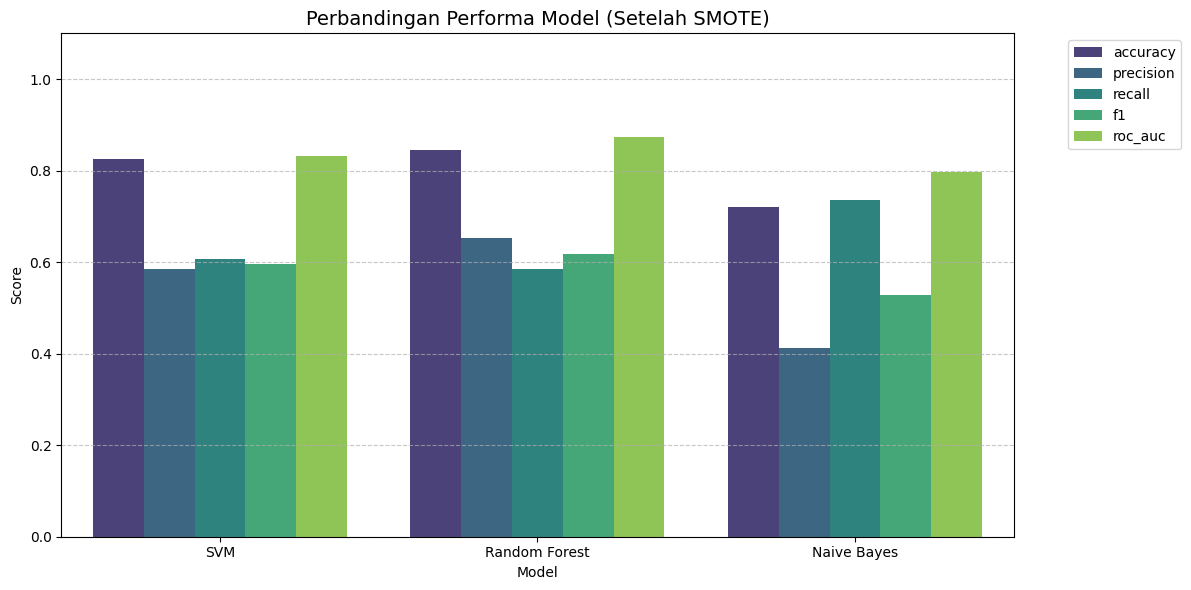

In [ ]:
# 4. Visualisasi Hasil
plt.figure(figsize=(12, 6))
# Mengubah format data agar cocok untuk seaborn (tidy format)
df_plot = cv_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
df_plot.columns = ['Model', 'Metric', 'Score']

sns.barplot(data=df_plot, x='Model', y='Score', hue='Metric', palette='viridis')

plt.title('Perbandingan Performa Model (Setelah SMOTE)', fontsize=14)
plt.ylim(0, 1.1) # Memberi ruang untuk legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

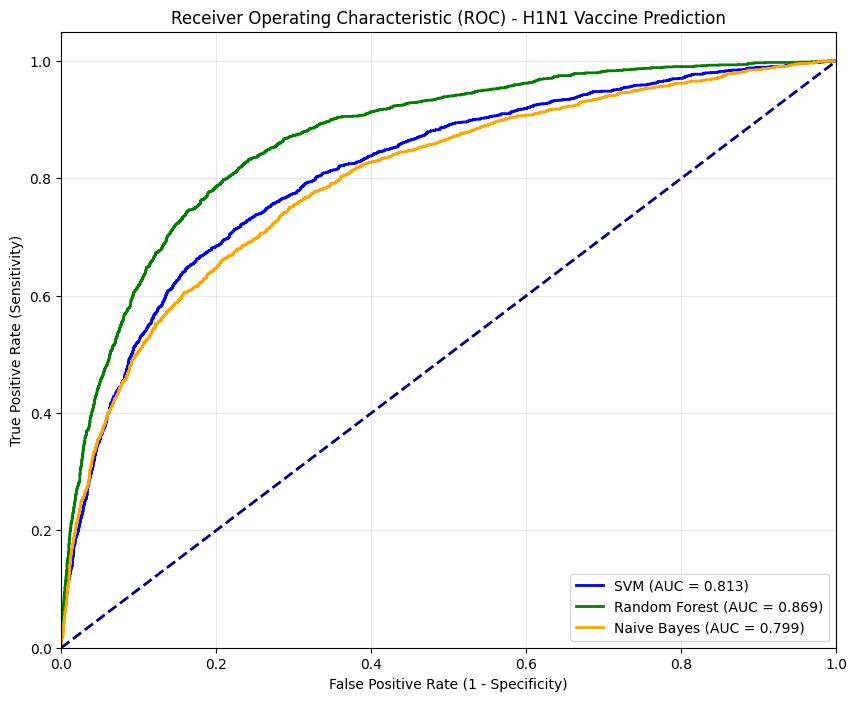

In [ ]:
# Inisialisasi Plot
plt.figure(figsize=(10, 8))

colors = {'SVM': 'blue', 'Random Forest': 'green', 'Naive Bayes': 'orange'}

for name, model in models.items():
    
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

    pipeline.fit(x_train, y_train)

    # Dapatkan probabilitas untuk kelas positif (vaksin = 1)
    # x_test harus sudah tersedia di environment Anda
    y_probs = pipeline.predict_proba(x_test)[:, 1]
   
    # Hitung FPR dan TPR
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    # Plot kurva
    plt.plot(fpr, tpr, color=colors[name], lw=2, 
             label=f'{name} (AUC = {roc_auc:.3f})')

# Plot garis referensi (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) - H1N1 Vaccine Prediction')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

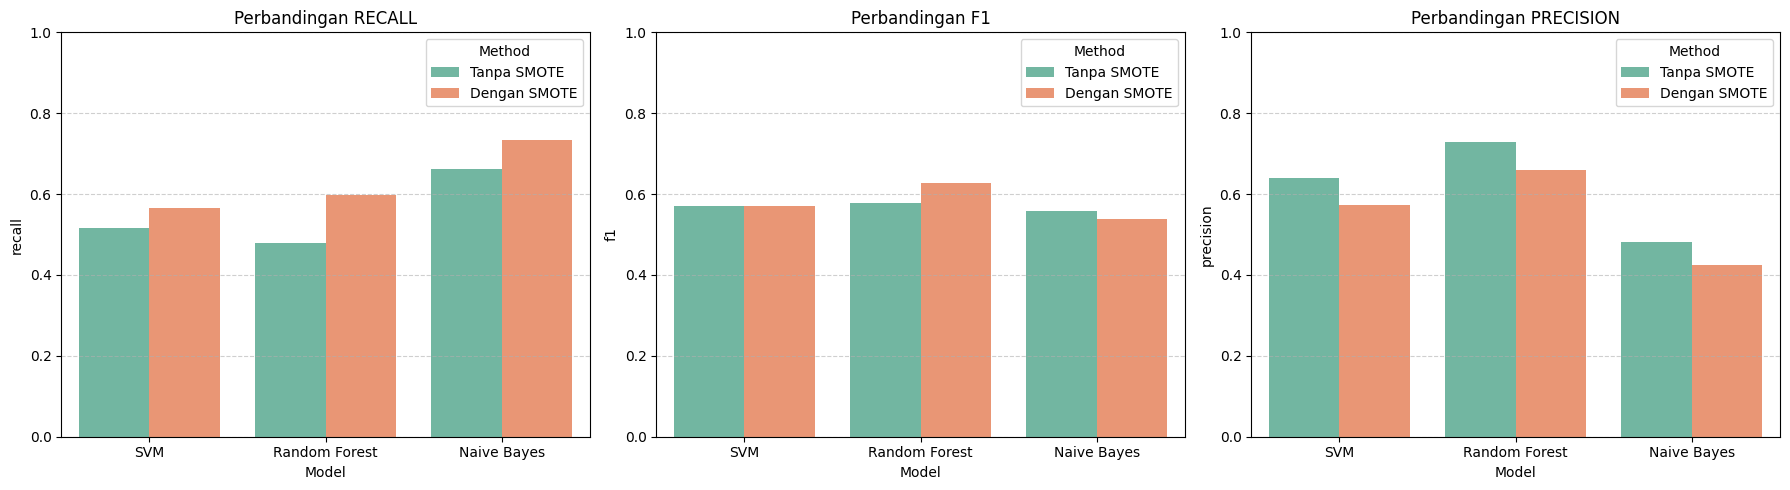

In [ ]:
# 1. Jalankan CV TANPA SMOTE
results_no_smote = {}
for name, model in models.items():
    pipeline_orig = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    scores = cross_validate(pipeline_orig, x_train, y_train, cv=cv, scoring=scoring)
    results_no_smote[name] = {m: scores[f'test_{m}'].mean() for m in scoring}

# 2. Jalankan CV DENGAN SMOTE (Gunakan imblearn)
results_with_smote = {}
for name, model in models.items():
    pipeline_smote = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])
    scores = cross_validate(pipeline_smote, x_train, y_train, cv=cv, scoring=scoring)
    results_with_smote[name] = {m: scores[f'test_{m}'].mean() for m in scoring}

# 3. Gabungkan Data untuk Visualisasi
df_before = pd.DataFrame(results_no_smote).T.reset_index().rename(columns={'index': 'Model'})
df_before['Method'] = 'Tanpa SMOTE'

df_after = pd.DataFrame(results_with_smote).T.reset_index().rename(columns={'index': 'Model'})
df_after['Method'] = 'Dengan SMOTE'

df_total = pd.concat([df_before, df_after])

# 4. Visualisasi Perbandingan (Fokus pada Recall dan F1-Score)
metrics_to_plot = ['recall', 'f1', 'precision']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics_to_plot):
    sns.barplot(data=df_total, x='Model', y=metric, hue='Method', ax=axes[i], palette='Set2')
    axes[i].set_title(f'Perbandingan {metric.upper()}', fontsize=12)
    axes[i].set_ylim(0, 1.0)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

ValueError: Unable to parse string "recall" at position 3

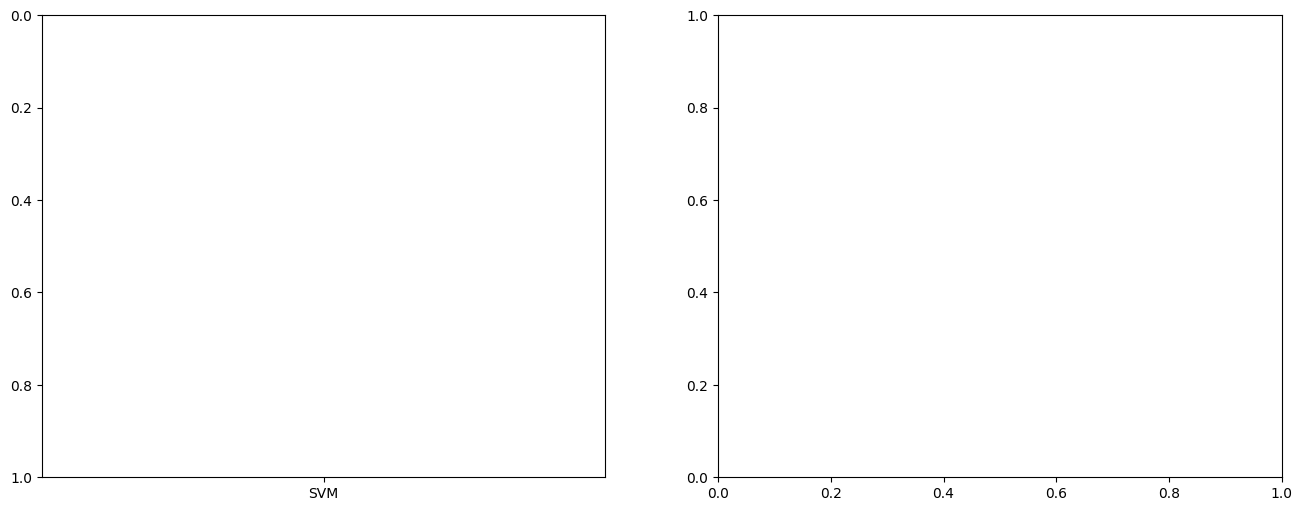

In [ ]:
data_before = {
    "Model": ["SVM", "Random Forest", "Naive Bayes"],
    "Recall": [0.35, 0.40, 0.45], # Contoh nilai rendah sebelum SMOTE
    "F1-Score": [0.46, 0.52, 0.49]
}

# 2. Data After SMOTE (Berdasarkan gambar hasil Anda)
data_after = {
    "Model": ["SVM", "Random Forest", "Naive Bayes"],
    "Recall": 'recall', # Data dari tabel Anda
    "F1-Score": 'f1_score'
}

df_before = pd.DataFrame(data_before)
df_before['Status'] = 'Before SMOTE'

df_after = pd.DataFrame(data_after)
df_after['Status'] = 'After SMOTE'

# Gabungkan data untuk plotting
df_comp = pd.concat([df_before, df_after])

# 3. Visualisasi
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot Recall
sns.barplot(data=df_comp, x='Model', y='Recall', hue='Status', ax=ax[0])
ax[0].set_title('Peningkatan Recall (Sensitivitas)', fontsize=14)
ax[0].set_ylim(0, 1)

# Plot F1-Score
sns.barplot(data=df_comp, x='Model', y='F1-Score', hue='Status', ax=ax[1])
ax[1].set_title('Perubahan F1-Score', fontsize=14)
ax[1].set_ylim(0, 1)

# Plot F1-Score
sns.barplot(data=df_comp, x='Model', y='F1-Score', hue='Status', ax=ax[1])
ax[1].set_title('Perubahan F1-Score', fontsize=14)
ax[1].set_ylim(0, 1)

plt.suptitle('Analisis Dampak SMOTE pada Model H1N1 Vaccine', fontsize=16)
plt.tight_layout()
plt.show()

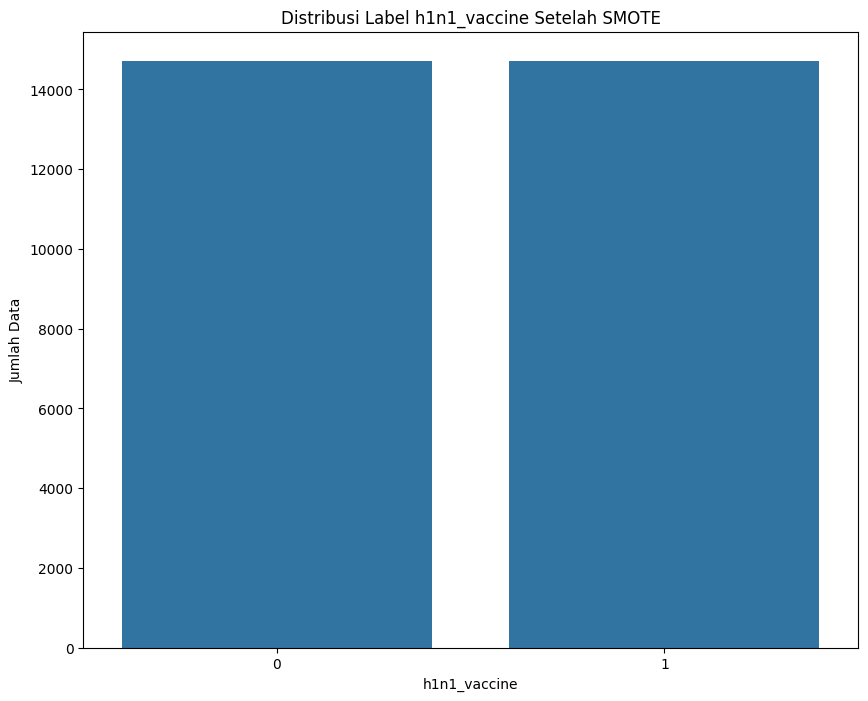

In [ ]:
# SMOTE manual hanya untuk visualisasi
smote = SMOTE(random_state=42)
x_smote_vis, y_smote_vis = smote.fit_resample(x_train, y_train)

# tampilkan distribusi label
df_smote = pd.DataFrame({
    'h1n1_vaccine': y_smote_vis
})

plt.figure(figsize=(10,8))
sns.countplot(x='h1n1_vaccine', data=df_smote)
plt.title("Distribusi Label h1n1_vaccine Setelah SMOTE")
plt.xlabel("h1n1_vaccine")
plt.ylabel("Jumlah Data")
plt.show()

In [ ]:
best_model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(
        n_estimators=130,
        max_depth=12,
        random_state=42
    ))
])

best_model.fit(x_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(max_depth=12, n_estimators=130,
                                        random_state=42))])

In [ ]:
y_pred = best_model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Confusion Matrix:
 [[5779  540]
 [ 709  985]]

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      6319
           1       0.65      0.58      0.61      1694

    accuracy                           0.84      8013
   macro avg       0.77      0.75      0.76      8013
weighted avg       0.84      0.84      0.84      8013



In [ ]:
rf=RandomForestClassifier(n_estimators=130,max_depth=12,min_samples_split=8)
rf.fit(x_smote,y_smote)
train_rf=rf.predict(x_smote)
test_rf=rf.predict(x_test)
report(y_smote,train_rf)
report(y_test,test_rf)

In [ ]:
# y_pred = best_model.predict(x_test)
# y_prob = best_model.predict_proba(x_test)[:,1]


In [ ]:
# cm = confusion_matrix(y_test, y_pred)

# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix - Final Model')
# plt.show()


In [ ]:
# print("Accuracy :", accuracy_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred, pos_label=1))
# print("Recall   :", recall_score(y_test, y_pred, pos_label=1))
# print("F1-Score :", f1_score(y_test, y_pred, pos_label=1))


metode biasa

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()
# x_train = scaler.fit_transform(x_train)
# x_test  = scaler.transform(x_test)

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0, 1))
# x_train = scaler.fit_transform(x_train)
# x_test  = scaler.transform(x_test)

In [ ]:
smote=SMOTE()
x_smote, y_smote=smote.fit_resample(x_train,y_train)

In [ ]:
x_smote.shape

(29428, 40)

In [ ]:
def report(actual,pred):
    acc_score=accuracy_score(actual,pred)
    con_mat=confusion_matrix(actual,pred)
    class_rep=classification_report(actual,pred)
    print("Accuracy of model is", round((acc_score*100),2),'%')
    print('\n ',con_mat)
    print('\n',class_rep)

In [ ]:
rf=RandomForestClassifier(n_estimators=130,max_depth=12,min_samples_split=8)
rf.fit(x_smote,y_smote)
train_rf=rf.predict(x_smote)
test_rf=rf.predict(x_test)
report(y_smote,train_rf)
report(y_test,test_rf)

Accuracy of model is 92.9 %

  [[13853   861]
 [ 1228 13486]]

               precision    recall  f1-score   support

           0       0.92      0.94      0.93     14714
           1       0.94      0.92      0.93     14714

    accuracy                           0.93     29428
   macro avg       0.93      0.93      0.93     29428
weighted avg       0.93      0.93      0.93     29428

Accuracy of model is 84.39 %

  [[5790  529]
 [ 722  972]]

               precision    recall  f1-score   support

           0       0.89      0.92      0.90      6319
           1       0.65      0.57      0.61      1694

    accuracy                           0.84      8013
   macro avg       0.77      0.75      0.76      8013
weighted avg       0.84      0.84      0.84      8013



In [ ]:
nb=GaussianNB()
nb.fit(x_smote, y_smote)
pred_train_nb=nb.predict(x_smote)
pred_tetst_nb=nb.predict(x_test)
report(y_smote, pred_train_nb)
report(y_test, pred_tetst_nb)

Accuracy of model is 75.22 %

  [[10754  3960]
 [ 3333 11381]]

               precision    recall  f1-score   support

           0       0.76      0.73      0.75     14714
           1       0.74      0.77      0.76     14714

    accuracy                           0.75     29428
   macro avg       0.75      0.75      0.75     29428
weighted avg       0.75      0.75      0.75     29428

Accuracy of model is 73.18 %

  [[4670 1649]
 [ 500 1194]]

               precision    recall  f1-score   support

           0       0.90      0.74      0.81      6319
           1       0.42      0.70      0.53      1694

    accuracy                           0.73      8013
   macro avg       0.66      0.72      0.67      8013
weighted avg       0.80      0.73      0.75      8013



In [ ]:
svm = SVC(kernel='rbf', C=5, gamma='scale', probability=True)
svm.fit(x_smote, y_smote)
train_svm=svm.predict(x_smote)
test_svm=svm.predict(x_test)
report(y_smote,train_svm)
report(y_test,test_svm)

Accuracy of model is 95.49 %

  [[13913   801]
 [  526 14188]]

               precision    recall  f1-score   support

           0       0.96      0.95      0.95     14714
           1       0.95      0.96      0.96     14714

    accuracy                           0.95     29428
   macro avg       0.96      0.95      0.95     29428
weighted avg       0.96      0.95      0.95     29428

Accuracy of model is 81.92 %

  [[5566  753]
 [ 696  998]]

               precision    recall  f1-score   support

           0       0.89      0.88      0.88      6319
           1       0.57      0.59      0.58      1694

    accuracy                           0.82      8013
   macro avg       0.73      0.73      0.73      8013
weighted avg       0.82      0.82      0.82      8013



In [ ]:
nb_model = GaussianNB()
nb_model.fit(x_smote, y_smote)

y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


NameError: name 'X_test' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', random_state=42)

svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


In [ ]:
models= ['Naive Bayes', 'Random Forest', 'SVM']
accuracies = [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svm)]
plt.figure(figsize=(10,6))
sns.lineplot(x=models, y=accuracies, palette="pastel")
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.show()  

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

def get_metrics(y_test, y_pred):
    report = classification_report(y_test, y_pred, output_dict=True)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"]
    }

results = []

results.append({
    "Algoritma": "Naive Bayes",
    **get_metrics(y_test, y_pred_nb)
})

results.append({
    "Algoritma": "SVM",
    **get_metrics(y_test, y_pred_svm)
})

results.append({
    "Algoritma": "Random Forest",
    **get_metrics(y_test, y_pred_rf)
})

comparison_df = pd.DataFrame(results)
comparison_df


In [ ]:
model_names = ['Naive Bayes', 'SVM', 'Random Forest']
models = {
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}
    
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, pos_label=1),
    'recall': make_scorer(recall_score, pos_label=1),
    'f1': make_scorer(f1_score, pos_label=1)
}



cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_results = []

for name, model in models.items():
    scores = cross_validate(
        model,
        x,
        y,
        cv=cv,
        scoring=scoring
    )

    cv_results.append({
        'Model': name,
        'Accuracy': scores['test_accuracy'].mean(),
        'Precision': scores['test_precision'].mean(),
        'Recall': scores['test_recall'].mean(),
        'F1-Score': scores['test_f1'].mean()
    })


In [ ]:
cv_results_df = pd.DataFrame(cv_results)
cv_results_df


In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

for name, model in models.items():
    # Pastikan model sudah dilatih
    model.fit(X_train, y_train)

    # Ambil skor probabilitas
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        # Untuk model yang tidak punya predict_proba (fallback)
        y_score = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

# Garis acak
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 0.01],
    'kernel': ['rbf'],
    'class_weight': [None, 'balanced']
}

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC

# svm_model = SVC(random_state=42)

# grid_search = GridSearchCV(
#     estimator=svm_model,
#     param_grid=param_grid,
#     scoring='accuracy',
#     cv=5,
#     n_jobs=-1,
#     verbose=2
# )

# grid_search.fit(X_train_scaled, y_train)

In [ ]:
# best_svm =  grid_search.best_estimator_
# y_pred_svm_tunned = best_svm.predict(X_test_scaled)

In [ ]:
# from sklearn.metrics import accuracy_score, classification_report

# print("Best Parameters:", grid_search.best_params_)
# print("Accuracy:", accuracy_score(y_test, y_pred_svm_tunned))
# print(classification_report(y_test, y_pred_svm_tunned))